
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-01 17:36:45--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-01 17:36:46--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?
**Hay 1596 tweets non biased y 318 biased**
2. ¿Cuál es el porcentaje de `biased` sobre el total?
**El porcentaje de biased es del 16.61**


In [2]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [4]:
tweets.value_counts('Label')

,count
Label,
non-biased,1596
biased,318


In [5]:
tweets.value_counts('Label')*100/len(tweets)

,count
Label,
non-biased,83.38558
biased,16.61442


<ipython-input-6-42fdb8cc68b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Label', data=tweets, palette='Set2')


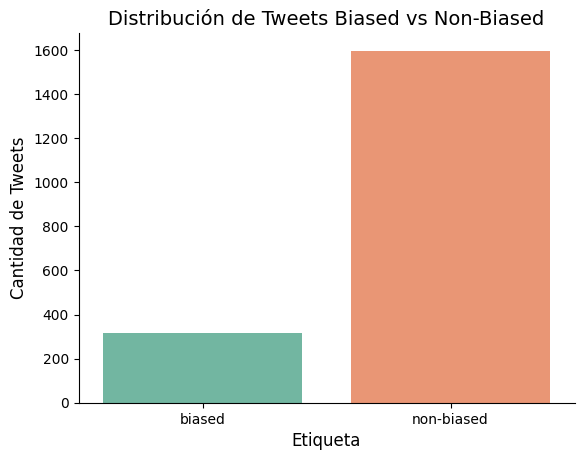

In [6]:
ax = sns.countplot(x='Label', data=tweets, palette='Set2')
ax.set_title('Distribución de Tweets Biased vs Non-Biased', fontsize=14)
ax.set_xlabel('Etiqueta', fontsize=12)
ax.set_ylabel('Cantidad de Tweets', fontsize=12)
ax.tick_params(axis='both', labelsize=10)
sns.despine()
plt.show()


## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?

**la longitud media paso de 92.62 a 59.56 tras la limpieza**

2. ¿Cuántos tweets quedaron vacíos después de la limpieza?

**No hay tweets vacios tras la limpieza**

In [7]:
spanish_stop=set(stopwords.words('spanish'))
spanish_stop

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [16]:
def clean(t):
    Contents=t.lower()
    t=re.sub(r'[áéíóúü@#^\\\]-]','',t)
    t= ' '.join([w for w in t.split() if w not in spanish_stop])
    palabras = t.split()
    palabras = [palabra for palabra in palabras if len(palabra) > 3]
    return ' '.join(palabras)

In [32]:
tweets['clean']=tweets['Contents'].apply(clean)
tweets[['Contents','clean']].head()

,Contents,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,chumeltorres cabrn! reciben noticias colchonci...
1,¿alguien es tan amable de ir a hacerme la comp...,¿alguien amable hacerme compra mañana? bajn an...
2,"@jenniferduquee hahaha, si está rico, nadamas ...","jenniferduquee hahaha, rico, nadamas falta pre..."
3,@evagelcot donde lo ves!!? es mi programa favo...,evagelcot ves!!? programa favorito encuentro t...
4,como siempre mi tortilla triunfa mas que otros...,siempre tortilla triunfa platos playa… https:/...


In [11]:
longitud_media_antes = tweets['Contents'].str.len().mean()
print(f"Longitud media antes de la limpieza: {longitud_media_antes}")

Longitud media antes de la limpieza: 92.62173458725182


In [12]:
longitud_media_despues = tweets['clean'].str.len().mean()
print(f"Longitud media después de la limpieza: {longitud_media_despues}")

Longitud media después de la limpieza: 59.562173458725184


In [14]:
tweets_vacios = tweets[tweets['clean'] == ''].shape[0]
print(f"Cantidad de tweets vacíos después de la limpieza: {tweets_vacios}")

Cantidad de tweets vacíos después de la limpieza: 0



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  

**[('mujer', 19),
 ('mujeres', 17),
 ('quiero', 14),
 ('mejor', 13),
 ('solo', 11),
 ('cosas', 9),
 ('ahora', 8),
 ('estn', 8),
 ('bonita', 8),
 ('hacer', 8)]**

2. ¿Qué diferencias de tono observas entre ambas nubes?

**En la nube de palabras de los tweets biased el tono se identifica como mas personal y subjetivo ademas emocional y expresivo. Por otro lado la de los tweets non biased es mas impersonal y objetivo con temas mas generales y no emocionales**


In [24]:
import matplotlib.pyplot as plt
from collections import Counter

biased_tweets = tweets[tweets['Label'] == 'biased']['clean']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']['clean']

In [19]:
def top_words(text_series, top_n=10):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

top_biased_words = top_words(biased_tweets)
top_non_biased_words = top_words(non_biased_tweets)

<ipython-input-21-c76d17c2e5b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette=color_palette)


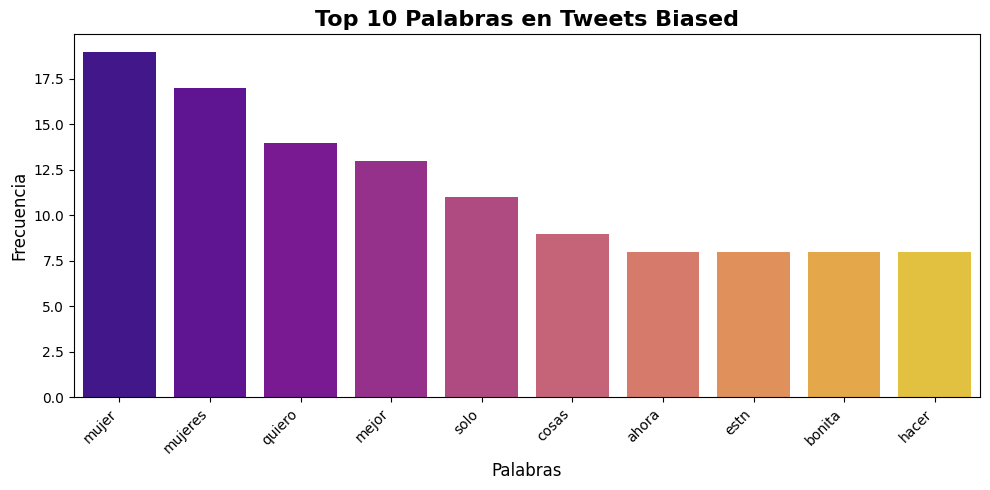

<ipython-input-21-c76d17c2e5b8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=words, y=counts, palette=color_palette)


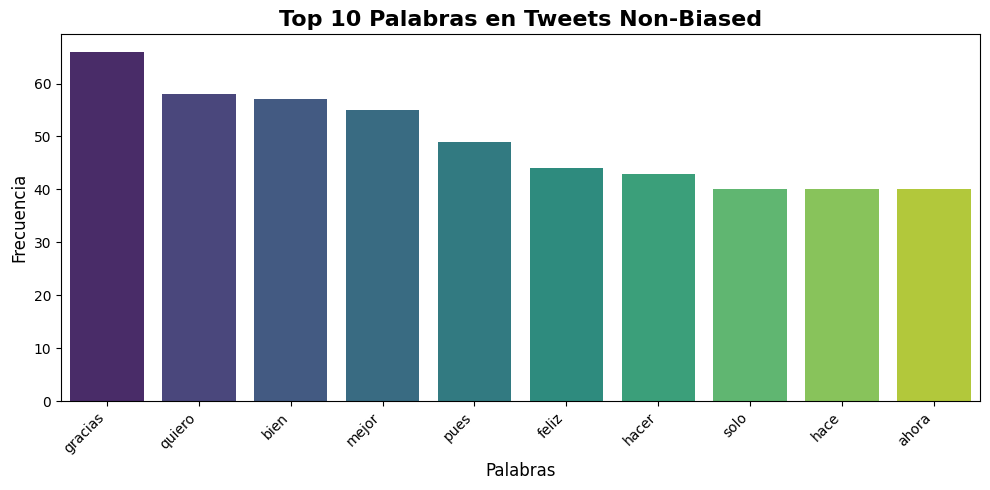

In [21]:
def plot_top_words(top_words, title, color_palette):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=words, y=counts, palette=color_palette)
    plt.title(title, fontweight='bold', fontsize=16)
    plt.xlabel('Palabras', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_top_words(top_biased_words, 'Top 10 Palabras en Tweets Biased', 'plasma')
plot_top_words(top_non_biased_words, 'Top 10 Palabras en Tweets Non-Biased', 'viridis')

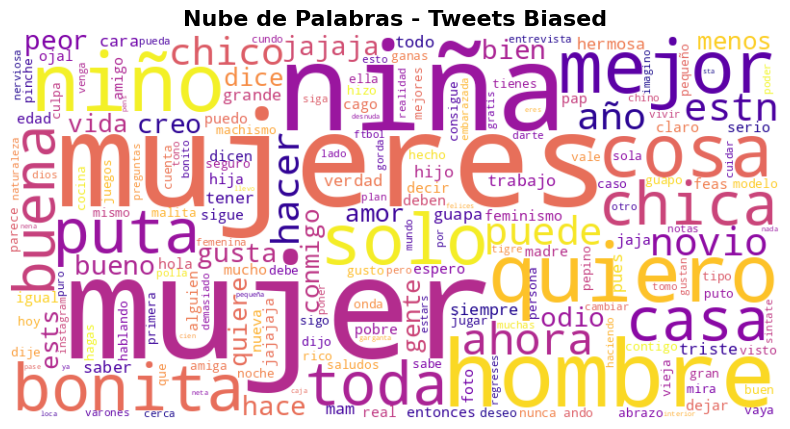

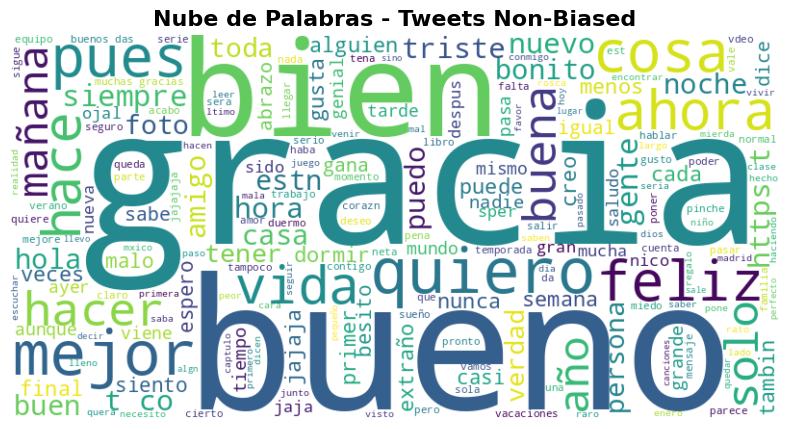

In [23]:
from wordcloud import WordCloud

def generar_nube_palabras(texto, titulo, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16, fontweight='bold')
    plt.show()

texto_biased = ' '.join(biased_tweets)
texto_non_biased = ' '.join(non_biased_tweets)

generar_nube_palabras(texto_biased, 'Nube de Palabras - Tweets Biased', 'plasma')
generar_nube_palabras(texto_non_biased, 'Nube de Palabras - Tweets Non-Biased', 'viridis')

In [30]:
from collections import Counter

biased_words = ' '.join(biased_tweets).split()
Counter(biased_words).most_common(10)

[('mujer', 19),
 ('mujeres', 17),
 ('quiero', 14),
 ('mejor', 13),
 ('solo', 11),
 ('cosas', 9),
 ('ahora', 8),
 ('estn', 8),
 ('bonita', 8),
 ('hacer', 8)]


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  

**Aunque la distribucion de la polaridad en los tweets biased esta ligeramente hacia el lado degativo y la de los non biased esta mas centrada, no se observan diferencias significativas en el sentimiento**

2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?

**Son ligeramente mas negativos pero no se evidencia una diferencia muy pronunciada**

In [34]:
from textblob import TextBlob

tweets['polarity'] = tweets['clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets.head()

,Contents,Label,clean,polarity
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrn! reciben noticias colchonci...,0.0
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien amable hacerme compra mañana? bajn an...,0.0
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"jenniferduquee hahaha, rico, nadamas falta pre...",0.2
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves!!? programa favorito encuentro t...,0.0
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa platos playa… https:/...,0.0


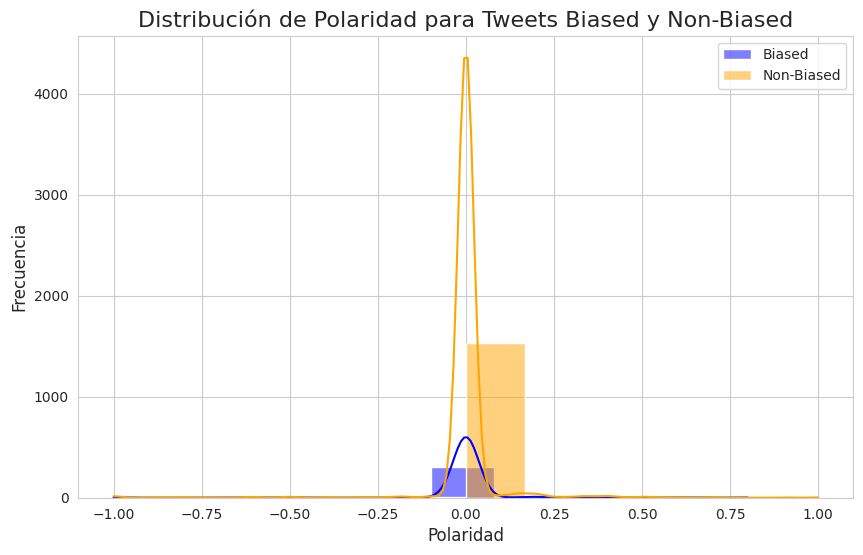

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(tweets[tweets['Label'] == 'biased']['polarity'], color="blue", label='Biased', kde=True)
sns.histplot(tweets[tweets['Label'] == 'non-biased']['polarity'], color="orange", label='Non-Biased', kde=True)
plt.title('Distribución de Polaridad para Tweets Biased y Non-Biased', fontsize=16)
plt.xlabel('Polaridad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend()
plt.show()



## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  

**El hashtag que mas se repite es el de hableconellas**

2. ¿Qué usuarios son los más mencionados y en qué contexto?

**blasauryn: 6
juanrallo: 4
youtube: 4
tenistachanel: 4
celopanyt: 4
pumasmx: 4
soyalannavarro: 3
mariobautista_: 3
luchalibreaaa: 3
eduardoramos95r: 3**

**El contexto generalmente es emocional, para expresar felicidad o interactuar con amigos hacia algo que les emociona a los usuarios**


In [39]:
import re

def extract_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags

def extract_mentions(text):
    mentions = re.findall(r"@(\w+)", text)
    return mentions

tweets['hashtags'] = tweets['Contents'].apply(extract_hashtags)
tweets['mentions'] = tweets['Contents'].apply(extract_mentions)
tweets.head()

,Contents,Label,clean,polarity,hashtags,mentions
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,chumeltorres cabrn! reciben noticias colchonci...,0.0,[extrañoreirconchumel],[chumeltorres]
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien amable hacerme compra mañana? bajn an...,0.0,[],[]
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"jenniferduquee hahaha, rico, nadamas falta pre...",0.2,[],[jenniferduquee]
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,evagelcot ves!!? programa favorito encuentro t...,0.0,[],[evagelcot]
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa platos playa… https:/...,0.0,[playa],[]


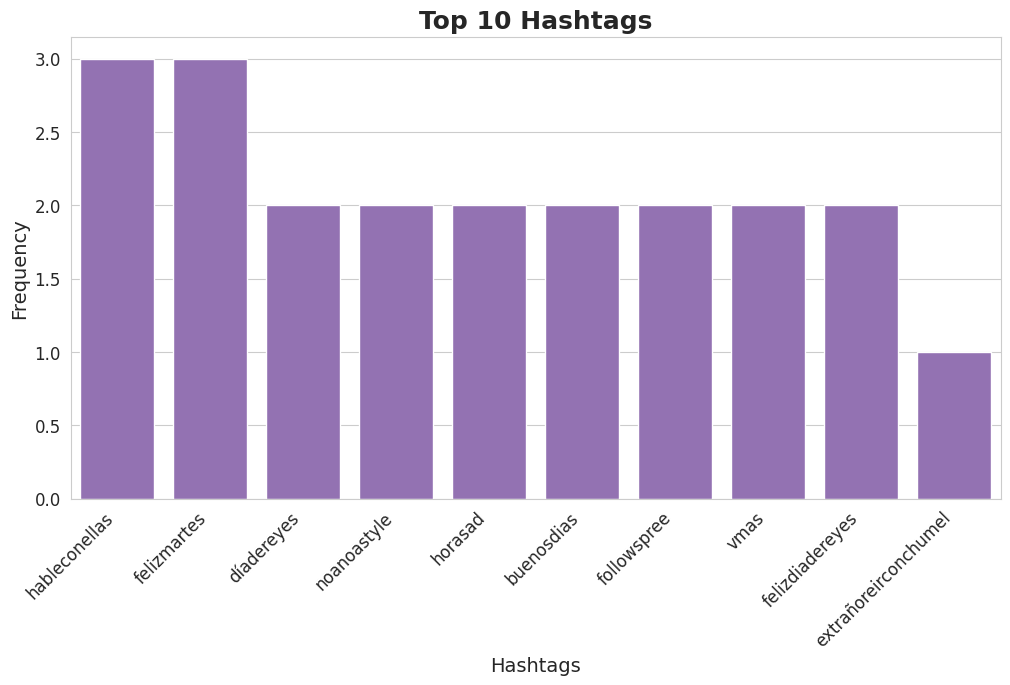

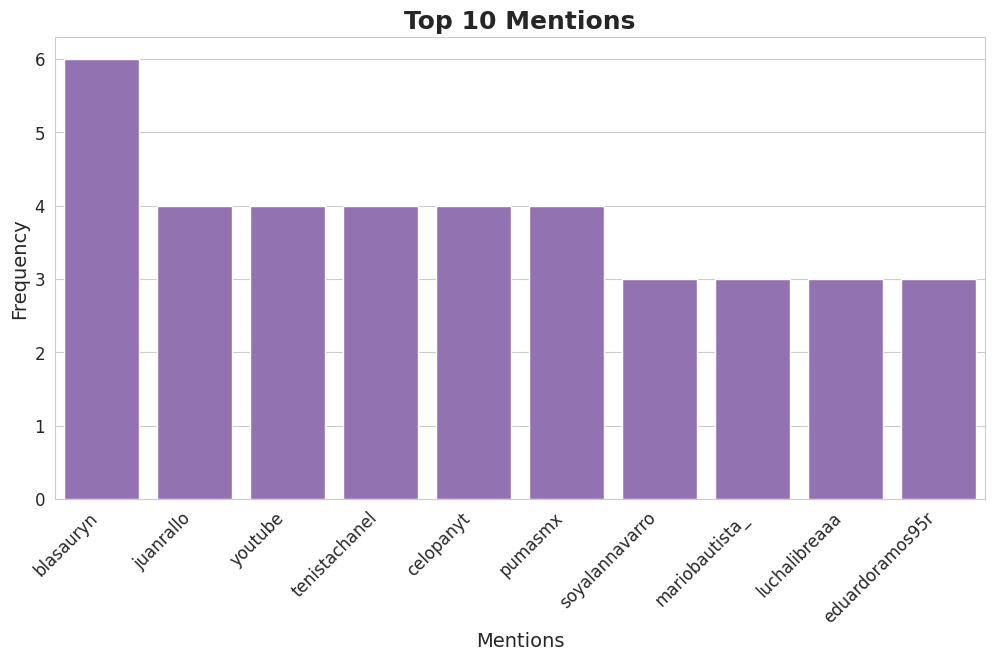

In [49]:
def plot_top_n(data, column_name, top_n=10, title="Top 10"):
    all_items = [item for sublist in data[column_name] for item in sublist]
    top_items = Counter(all_items).most_common(top_n)

    items, counts = zip(*top_items)

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    ax = sns.barplot(x=items, y=counts, color="#9467bd")

    plt.title(f"{title} {column_name.title()}", fontsize=18, fontweight='bold')
    plt.xlabel(column_name.title(), fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_top_n(tweets, 'hashtags', title="Top 10")
plot_top_n(tweets, 'mentions', title="Top 10")

In [52]:

frecuencias_hashtags = {'biased': Counter(), 'non-biased': Counter()}
for index, row in tweets.iterrows():
    etiqueta = row['Label']
    hashtags = row['hashtags']
    for hashtag in hashtags:
        frecuencias_hashtags[etiqueta][hashtag] += 1

print("Frecuencias de hashtags para tweets 'biased':")
for hashtag, frecuencia in frecuencias_hashtags['biased'].items():
    print(f"{hashtag}: {frecuencia}")


Frecuencias de hashtags para tweets 'biased':
extrañoreirconchumel: 1
javiercarbajaldiseñador: 1
cdmx: 1
atelierjaviercarbajal: 1
horasad: 1
f: 1
asociacionmariloli: 1
elrabode8cho: 1
siqueríacontigopero: 1
hableconellas: 2
laschichisdefichis: 1
feliz: 1
este2017: 1
sinpresion: 1
asilascosas: 1
alexalaire: 1
sabadosimpactantes: 1
yafmvilla: 1
musica: 1
porsiteloperdiste: 1
followspree: 1
willytoledo: 1


In [54]:
print("Frecuencias de hashtags para tweets 'non-biased':")
for hashtag, frecuencia in frecuencias_hashtags['non-biased'].items():
    print(f"{hashtag}: {frecuencia}")

Frecuencias de hashtags para tweets 'non-biased':
playa: 1
eneneroyo: 1
mn: 1
donostia: 1
fútbol: 1
firstdates112: 1
hableconellas: 1
pereza: 1
ganascero: 1
septiembre: 1
anotele: 1
ganandocomosiempre: 1
somescola: 1
fail: 1
eslaultimavezquetedigo: 1
seestrenasietevidas: 1
yanohaydepastorjoven: 1
miguelrios: 1
insurrección: 1
tardeparalaira: 1
díadereyes: 2
pasitoperrónchallenge: 1
noanoastyle: 2
corrupciónpp: 1
ilovemywork: 1
totales: 1
conmtval727tour: 1
estefintengoganasde: 1
ideamillonaria: 1
sinpayasonohayfiesta: 1
arrepapá: 1
bhmallorca: 1
magaluf: 1
mallorca: 1
island: 1
summer2016: 1
unminutosindolor: 1
40globalshow51: 1
otegi: 1
eslasentencia: 1
essucultura: 1
creatividad: 1
stop: 1
getwellsoonselena: 1
gazolinazo: 1
barbie: 1
mamaheasesinadoaminovia: 1
teníamostodopero: 1
felizmartes: 3
vacaciones: 1
planetainquietante: 1
portonovo: 1
jodid: 1
quenosepierdalacostumbre: 1
ford: 1
méxico: 1
estiempode: 1
bilbao: 1
quiquegonzález: 1
totalmentepayaso: 1
gasolinazo: 1
horasad: 1
k

In [70]:

all_mentions = [mention for sublist in tweets['mentions'] for mention in sublist]
mention_counts = Counter(all_mentions)

top_mentions = mention_counts.most_common(10)

print("Usuarios más mencionados:")
for mention, count in top_mentions:
    print(f"{mention}: {count}")

top_mention_names = [mention[0] for mention in top_mentions]
filtered_tweets = tweets[tweets['mentions'].apply(lambda mentions: any(mention in mentions for mention in top_mention_names))]

print("\nTweets con las menciones más frecuentes y su contexto:")
for index, row in filtered_tweets.iterrows():
    print(f"Tweet: {row['Contents']}")



Usuarios más mencionados:
blasauryn: 6
juanrallo: 4
youtube: 4
tenistachanel: 4
celopanyt: 4
pumasmx: 4
soyalannavarro: 3
mariobautista_: 3
luchalibreaaa: 3
eduardoramos95r: 3

Tweets con las menciones más frecuentes y su contexto:
Tweet: @soyalannavarro buenas noches risitas ...sueña bonito...!
Tweet: @kosto_trading @juanrallo o ponerte un casco de moto que te cubra por entero 
Tweet: @mariobautista_ soy mala bautister, no puse el 11:14
Tweet: @soyalannavarro me pregunto: ¿habrás leído mi tweet y te sorprendiste por que ese es mi máximo nivel creativo? me temo que sí.
Tweet: risitas estás ahí ??? ...bueno no importa sólo pasaba a desearte buenas noches @soyalannavarro ...descansa
Tweet: @pagano656 #noanoastyle es uno de los mejores luchadores que ha llegado a @luchalibreaaa yo tengo el gusto de seguirlo hace 4 años
Tweet: el #noanoastyle es lo mejor que ha llegado a @luchalibreaaa @pagano656 enhorabuena #sinpayasonohayfiesta #arrepapá
Tweet: @victorypeace76 @martiade @youtube lo de la


## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.

**ciertas palabras como "mujer", "mujeres", "bonita" aparecen con mayor frecuencia en los tweets etiquetados como "biased"**

**Los tweets "biased" tienden a usar un lenguaje más personal, emocional y expresivo, mientras que los "non-biased" son más impersonales y objetivos**

* Un insight sobre el **sentimiento**.  

**se observa que la distribución de la polaridad para tweets "biased" y "non-biased" es relativamente similar, con una ligera tendencia hacia la negatividad en los tweets "biased". Sin embargo, la diferencia no es lo suficientemente pronunciada como para considerarla un factor determinante**

* Una recomendación de comunicación para la marca.

**El análisis de los tweets revela la presencia de un sesgo de género en el lenguaje, particularmente en los tweets etiquetados como "biased". Se observa un énfasis en aspectos relacionados con la apariencia o el género femenino, lo que puede reflejar estereotipos o roles de género preexistentes.**
